In [1]:
import numpy as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import sklearn as sl
from sklearn.model_selection import train_test_split
import plotly.io as pio
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pio.renderers.default = "svg"

In [2]:
ev_car_analysis = pd.read_csv("EV_cars_India_2023.csv")
ev_geo_data=pd.read_csv("EV stats.csv")

In [3]:
ev_car_analysis.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [4]:
ev_geo_data.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0


In [5]:
ev_geo_data.isnull().sum()

Sl. No                                                                1
State                                                                 1
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    4
Two Wheelers (Category L2 (CMVR))                                     4
Two Wheelers (Max power not exceeding 250 Watts)                      4
Three Wheelers (Category L5 slow speed as per CMVR)                   1
Three Wheelers (Category L5 as per CMVR)                              4
Passenger Cars (Category M1 as per CMVR)                              4
Buses                                                                 4
Total in state                                                        4
dtype: int64

In [6]:
ev_car_analysis.isnull().sum()

Car_name         0
Car_price        0
Batter_cap       3
Drive_range      0
Power            0
Charge_time      0
transmission     2
Boot_space      18
Top_speed       24
dtype: int64

In [7]:
ev_geo_data.shape

(35, 10)

In [8]:
ev_car_analysis.shape

(30, 9)

In [9]:
print(ev_geo_data.info())
print(ev_car_analysis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Sl. No                                                              34 non-null     object 
 1   State                                                               34 non-null     object 
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     float64
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     float64
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     float64
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 34 non-null     object 
 6   Three Wheelers (Category L5 as per CMVR)                            31 non-null     float64
 7   Passenger Cars (Cat

array([[<AxesSubplot:title={'center':'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'}>,
        <AxesSubplot:title={'center':'Two Wheelers (Category L2 (CMVR))'}>,
        <AxesSubplot:title={'center':'Two Wheelers (Max power not exceeding 250 Watts)'}>],
       [<AxesSubplot:title={'center':'Three Wheelers (Category L5 as per CMVR)'}>,
        <AxesSubplot:title={'center':'Passenger Cars (Category M1 as per CMVR)'}>,
        <AxesSubplot:title={'center':'Buses'}>],
       [<AxesSubplot:title={'center':'Total in state'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

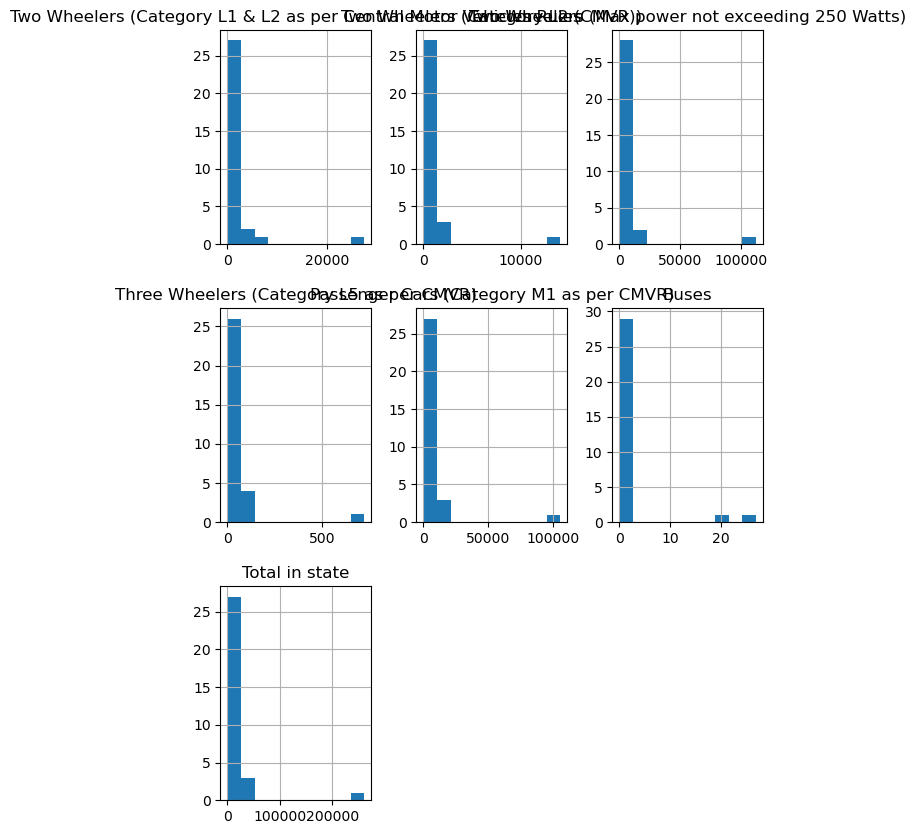

In [10]:
ev_geo_data.hist(figsize = (7,10))

<AxesSubplot:>

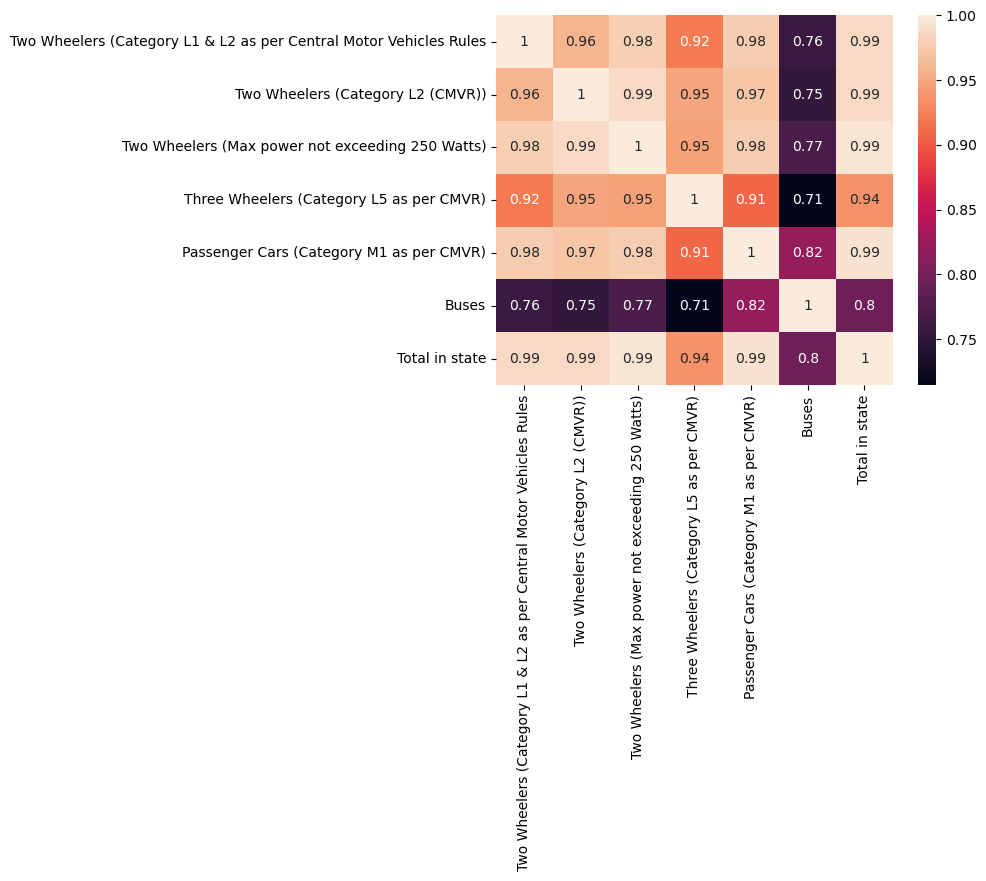

In [11]:
sns.heatmap(ev_geo_data.corr(),annot=True)

In [12]:
ev_geo_data['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'].std()

5000.160994397327

In [13]:
ev_geo_data['Three Wheelers (Category L5 as per CMVR)'].std()

131.49115019895888

In [14]:
ev_geo_data['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'].mean()

1777.3548387096773

In [15]:
ev_geo_data['Three Wheelers (Category L5 as per CMVR)'].mean()

46.45161290322581

In [16]:
%pip install kaleido
import kaleido

Note: you may need to restart the kernel to use updated packages.


In [17]:
d1 = ev_car_analysis.describe()
d2 = ev_geo_data.describe()
display(d1,d2)

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
count,30,30,27,30,30,30,28,12,6
unique,30,29,16,18,18,14,12,2,4
top,MG Comet EV,1.9 cr,17.3 kWh,230 km/full charge,41.42 Bhp,Automatic,Automatic,Automatic,200kmph
freq,1,2,2,2,2,7,12,10,3


,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1777.354839,907.677419,7260.516129,46.451613,6811.032258,1.741935,16829.870968
std,5000.160994,2518.917378,20008.445495,131.491150,18941.726543,6.016465,46327.212405
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,22.000000,19.000000,94.000000,0.000000,236.500000,0.000000,665.000000
50%,463.000000,228.000000,2148.000000,1.000000,997.000000,0.000000,4234.000000
75%,1089.500000,767.500000,6639.000000,37.500000,5487.500000,0.000000,14951.500000
max,27549.000000,14069.000000,112538.000000,720.000000,105571.000000,27.000000,260863.000000


In [18]:
ev_geo_data.columns

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

In [19]:
ev_car_analysis.columns

Index(['Car_name', 'Car_price', 'Batter_cap', 'Drive_range', 'Power',
       'Charge_time', 'transmission', 'Boot_space', 'Top_speed'],
      dtype='object')

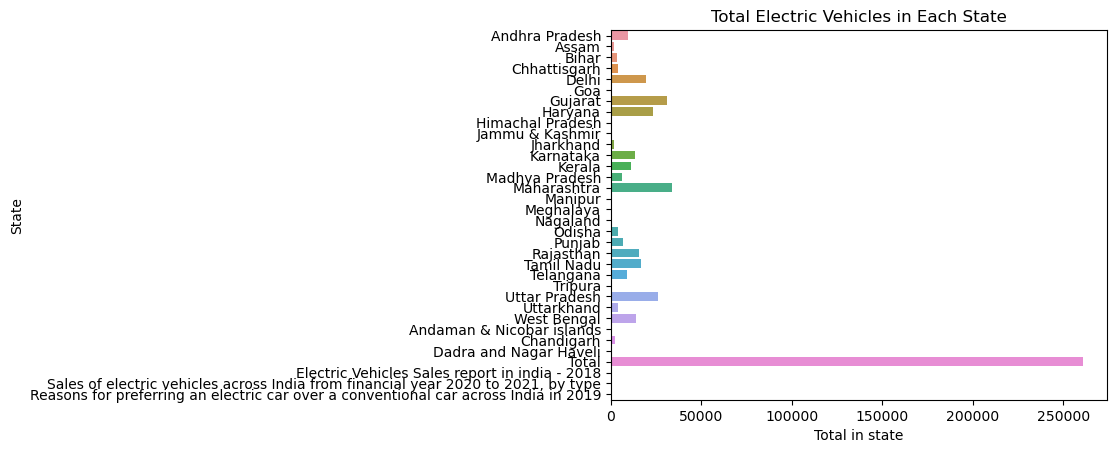

In [20]:
sns.barplot(x='Total in state', y='State', data=ev_geo_data)
plt.title('Total Electric Vehicles in Each State')
plt.xlabel('Total in state')
plt.ylabel('State')
plt.show()

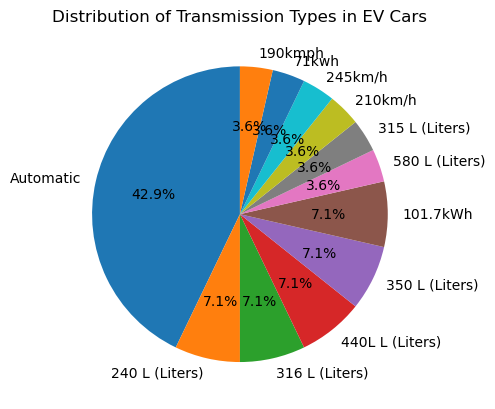

In [21]:
transmission_counts = ev_car_analysis['transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types in EV Cars')
plt.show()

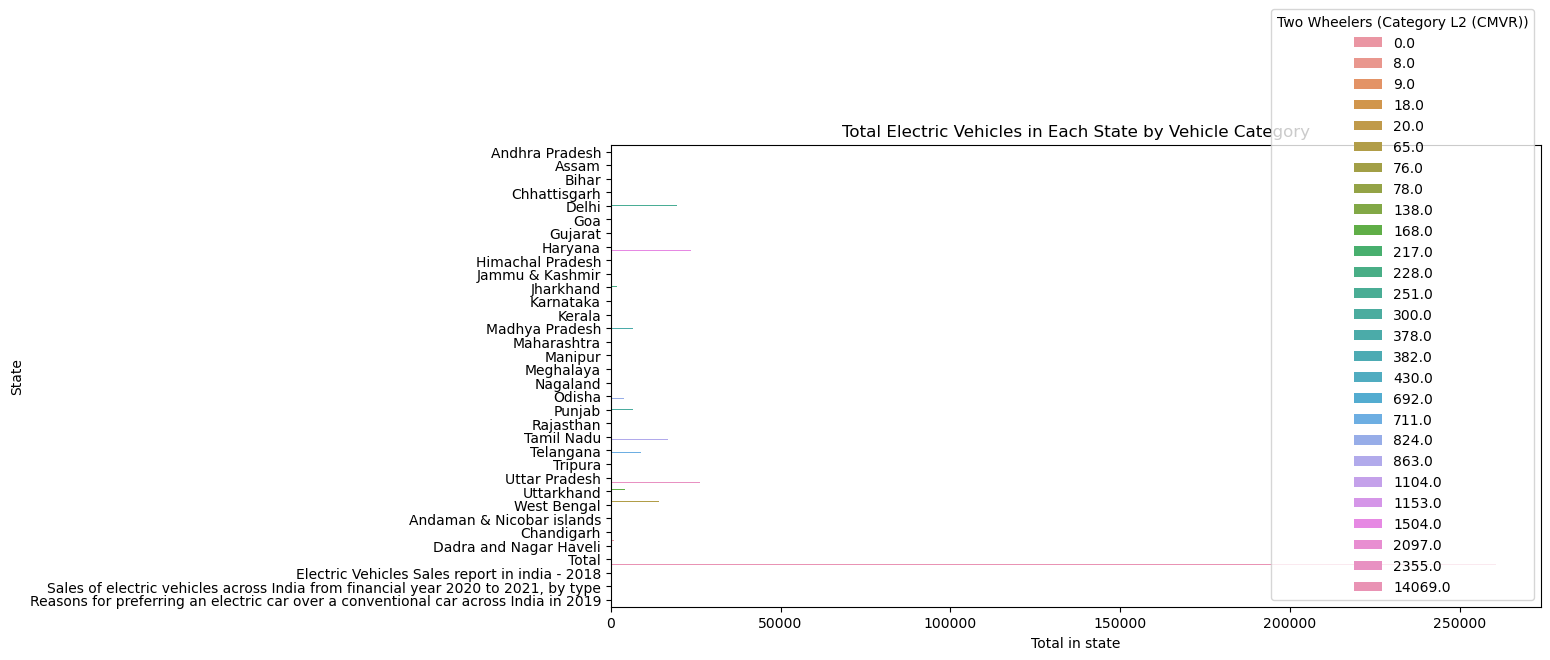

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total in state', y='State', hue='Two Wheelers (Category L2 (CMVR))', data=ev_geo_data)
plt.title('Total Electric Vehicles in Each State by Vehicle Category')
plt.xlabel('Total in state')
plt.ylabel('State')
plt.legend(title='Two Wheelers (Category L2 (CMVR))', loc='lower right')
plt.show()

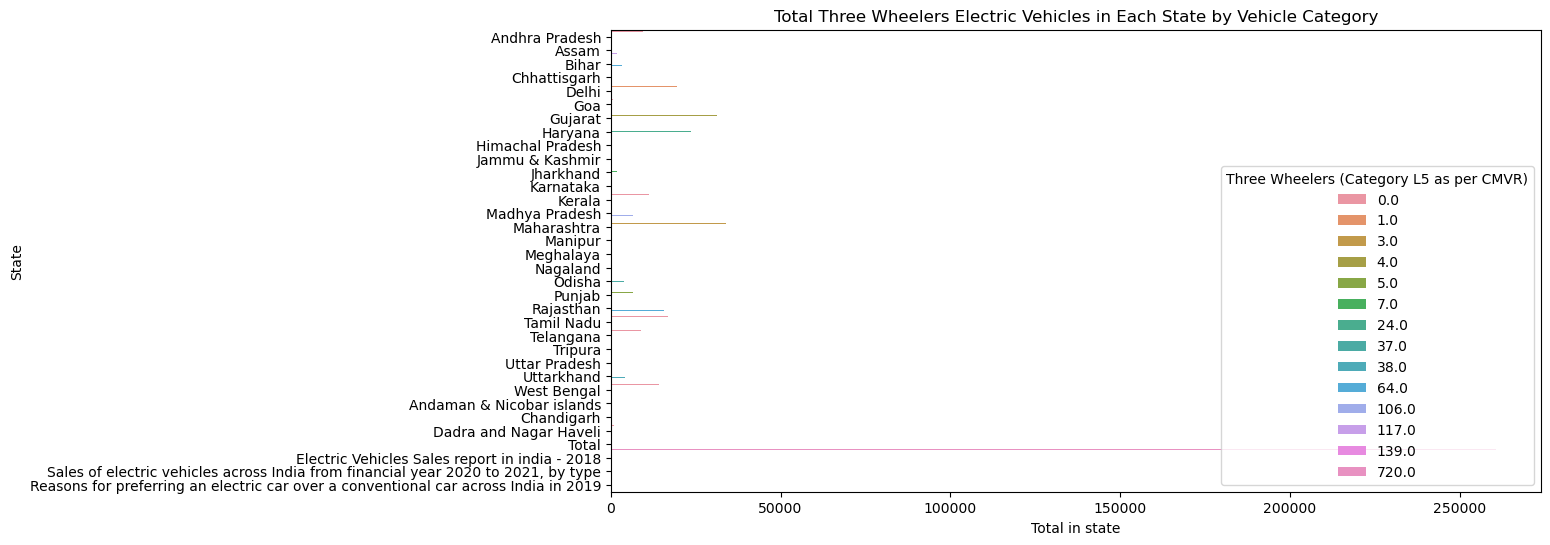

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total in state', y='State', hue='Three Wheelers (Category L5 as per CMVR)', data=ev_geo_data)
plt.title('Total Three Wheelers Electric Vehicles in Each State by Vehicle Category')
plt.xlabel('Total in state')
plt.ylabel('State')
plt.legend(title='Three Wheelers (Category L5 as per CMVR)', loc='lower right')
plt.show()

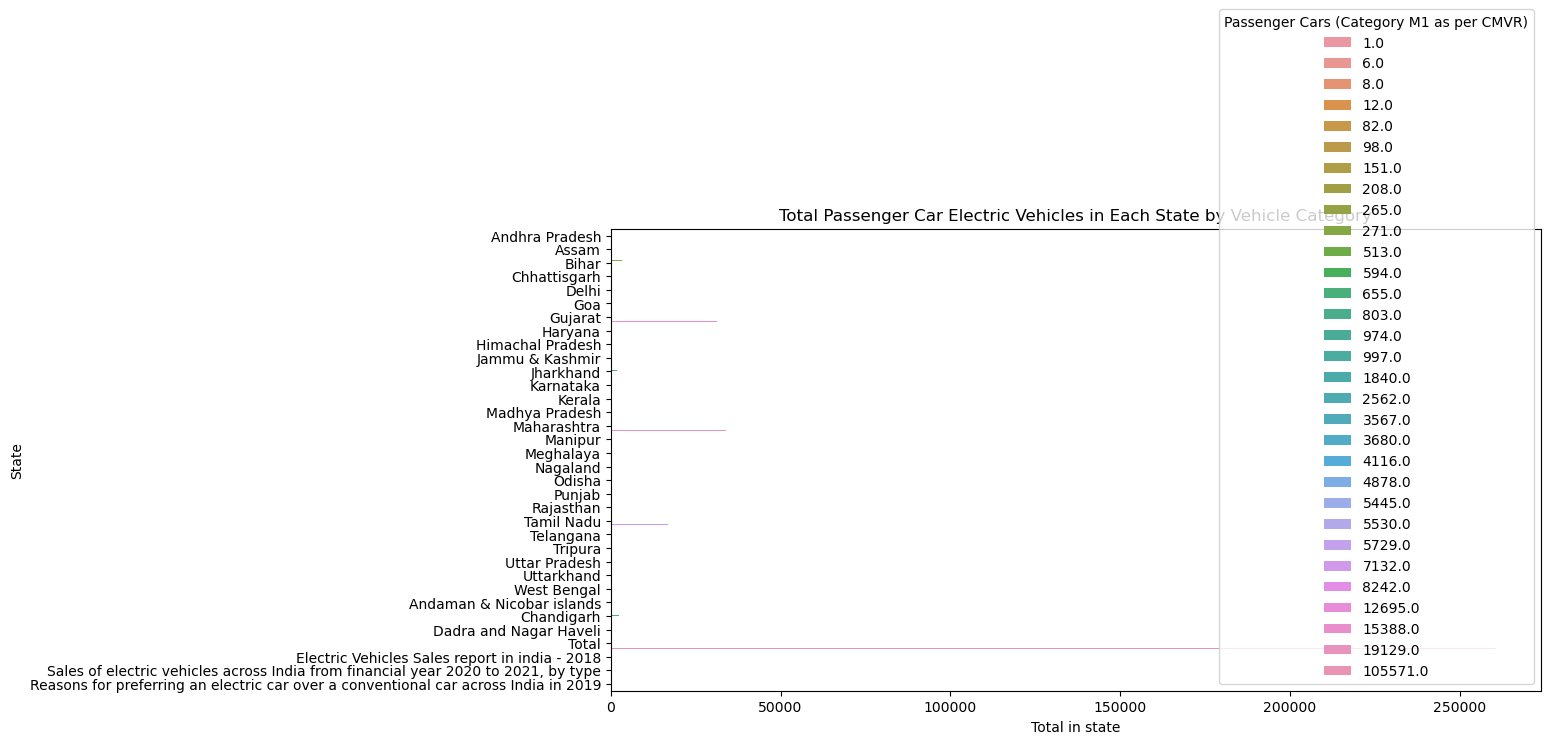

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total in state', y='State', hue='Passenger Cars (Category M1 as per CMVR)', data=ev_geo_data)
plt.title('Total Passenger Car Electric Vehicles in Each State by Vehicle Category')
plt.xlabel('Total in state')
plt.ylabel('State')
plt.legend(title='Passenger Cars (Category M1 as per CMVR)', loc='lower right')
plt.show()

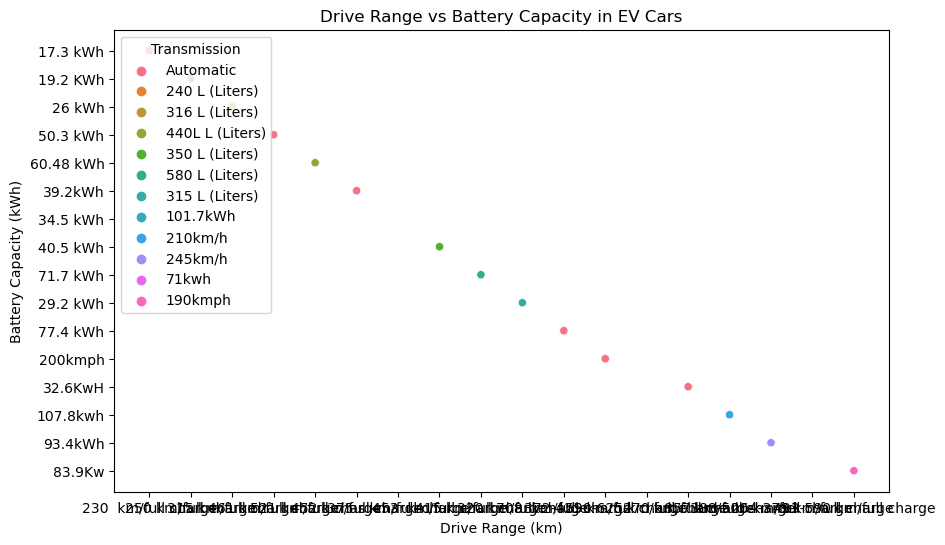

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Drive_range', y='Batter_cap', hue='transmission', data=ev_car_analysis)
plt.title('Drive Range vs Battery Capacity in EV Cars')
plt.xlabel('Drive Range (km)')
plt.ylabel('Battery Capacity (kWh)')
plt.legend(title='Transmission', loc='upper left')
plt.show()

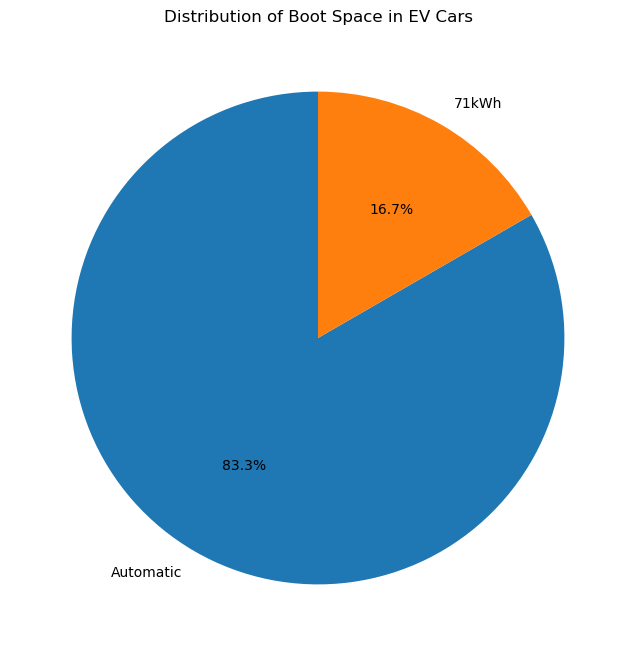

In [26]:
boot_space_counts = ev_car_analysis['Boot_space'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(boot_space_counts, labels=boot_space_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Boot Space in EV Cars')
plt.show()

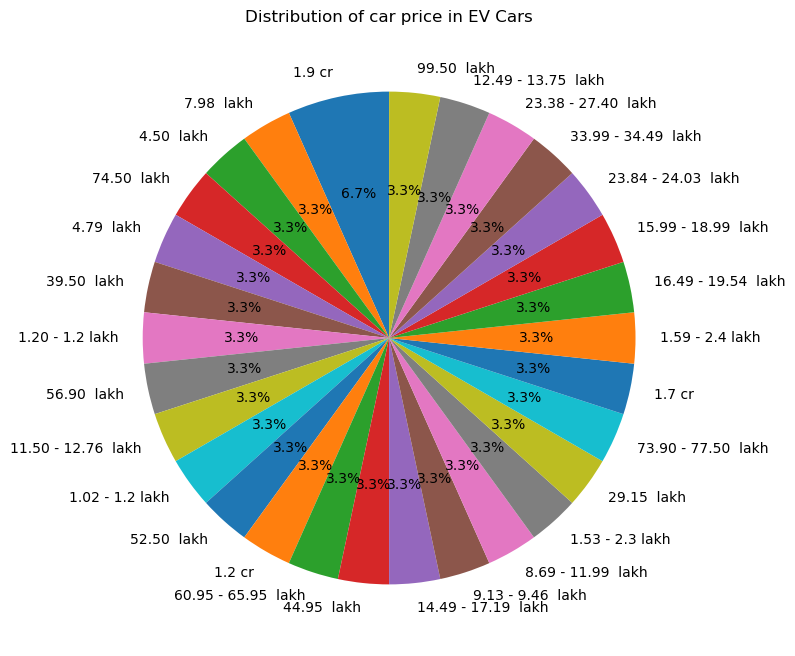

In [27]:
car_price_counts = ev_car_analysis['Car_price'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(car_price_counts, labels=car_price_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of car price in EV Cars')
plt.show()

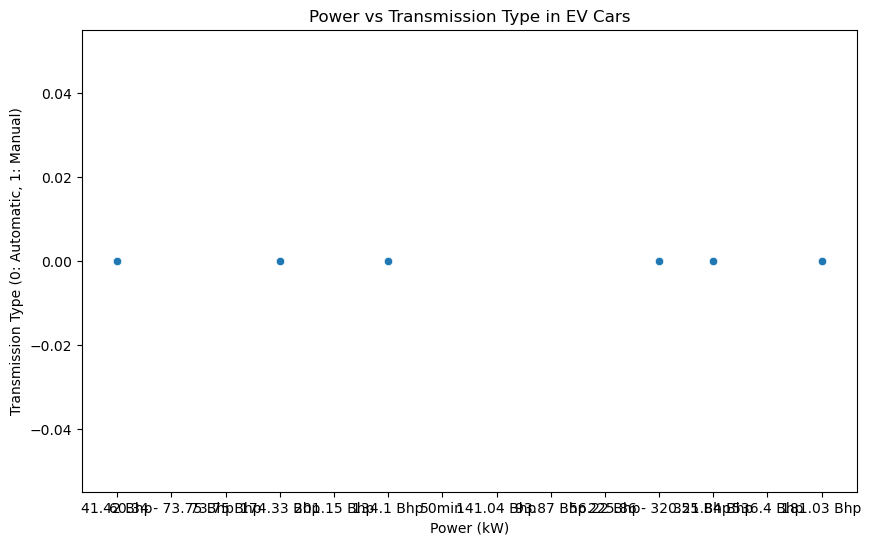

In [28]:
# Assuming 'transmission' is a categorical column with two values: 'Automatic' and 'Manual'
ev_car_analysis['transmission_numeric'] = ev_car_analysis['transmission'].map({'Automatic': 0, 'Manual': 1})
# Scatter plot of Power vs Transmission (Numerical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power', y='transmission_numeric', data=ev_car_analysis)
plt.title('Power vs Transmission Type in EV Cars')
plt.xlabel('Power (kW)')
plt.ylabel('Transmission Type (0: Automatic, 1: Manual)')
plt.show()

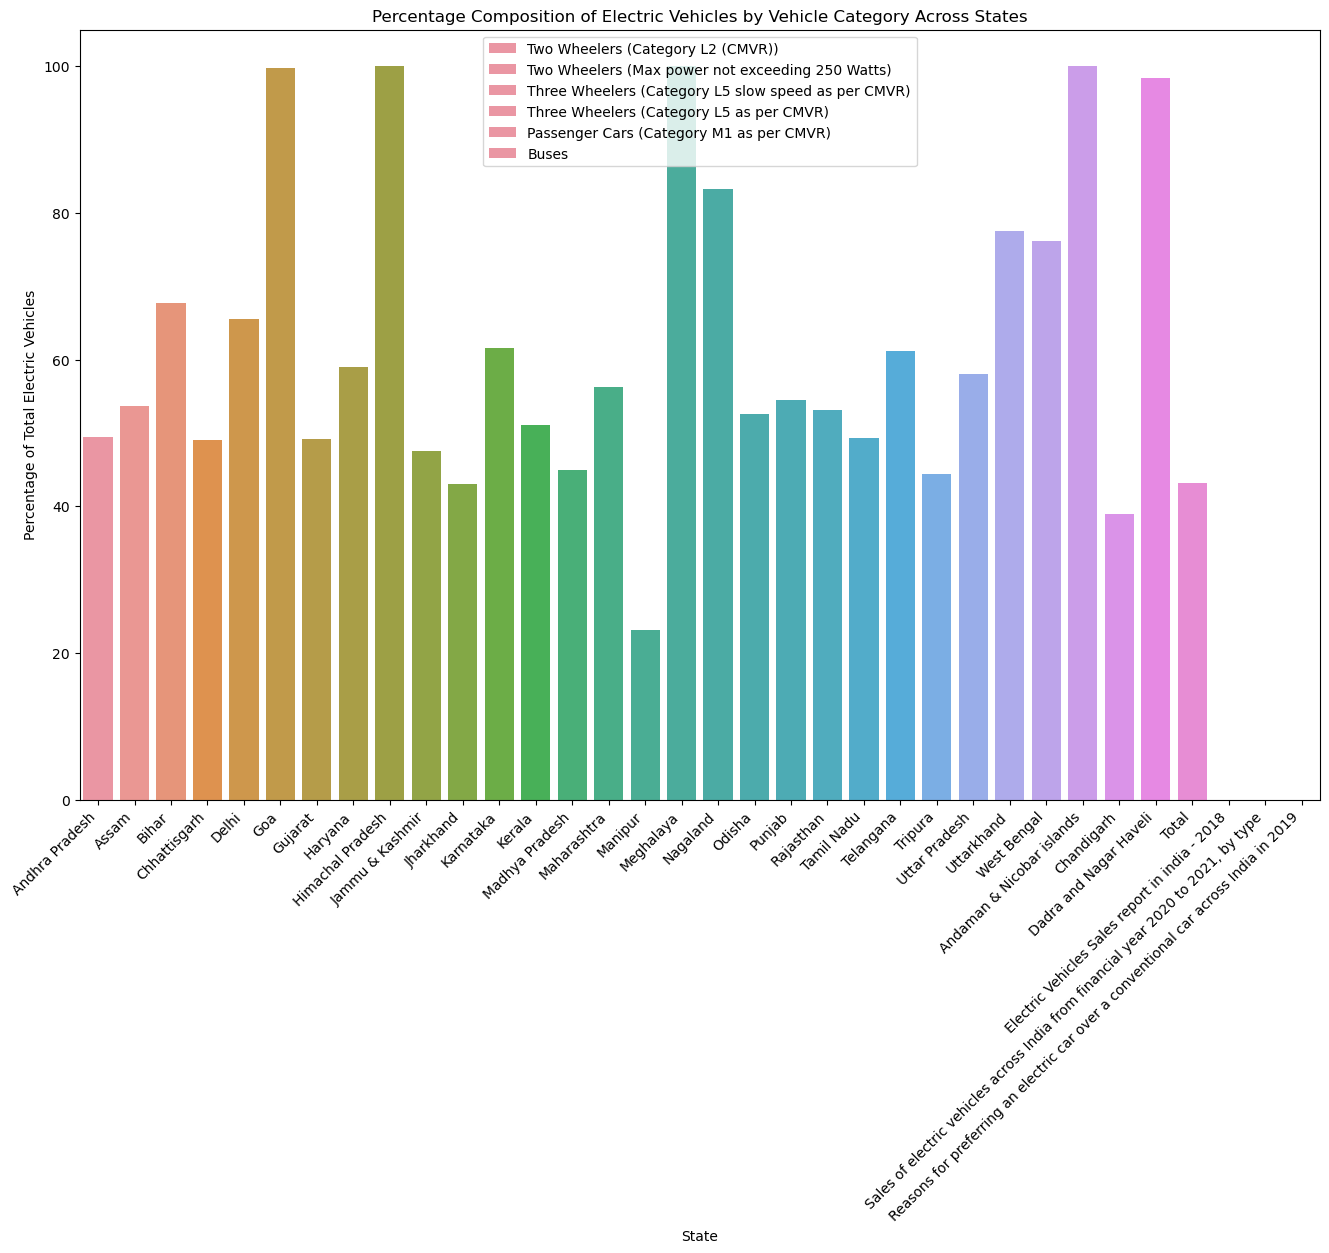

In [29]:
vehicle_categories = [
    'Two Wheelers (Category L2 (CMVR))',
    'Two Wheelers (Max power not exceeding 250 Watts)',
    'Three Wheelers (Category L5 slow speed as per CMVR)',
    'Three Wheelers (Category L5 as per CMVR)',
    'Passenger Cars (Category M1 as per CMVR)',
    'Buses'
]

# Remove any non-numeric characters from relevant columns
ev_geo_data[vehicle_categories] = ev_geo_data[vehicle_categories].replace({',': ''}, regex=True)

# Convert columns to numeric
ev_geo_data[vehicle_categories] = ev_geo_data[vehicle_categories].apply(pd.to_numeric, errors='coerce')

# Calculate the percentage composition for each vehicle category
plt.figure(figsize=(16, 10))
for category in vehicle_categories:
    ev_geo_data[category + '_percentage'] = (ev_geo_data[category] / ev_geo_data['Total in state']) * 100
    sns.barplot(x='State', y=category + '_percentage', data=ev_geo_data, label=category)

plt.title('Percentage Composition of Electric Vehicles by Vehicle Category Across States')
plt.xlabel('State')
plt.ylabel('Percentage of Total Electric Vehicles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

In [30]:
ev_car_analysis[['Top_speed', 'Car_price']].groupby("Top_speed").count()

,Car_price
Top_speed,
190kmph,1
200kmph,3
210km/h,1
245km/h,1


In [31]:
ev_car_analysis.sort_values("Top_speed",ascending = False).head(10)

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed,transmission_numeric
27,PMV EaS E,4.79 lakh,93.4kWh,388-500 km/full charge,5:15 Hours,Automatic,245km/h,NaN,245km/h,NaN
26,Pravaig DEFY,39.50 lakh,107.8kwh,857 km/full charge,516.29 - 750.97 Bhp,Automatic,210km/h,NaN,210km/h,NaN
19,BMW iX,1.2 cr,200kmph,372-425 km/full charge,321.84 Bhp,7.25h(AC 0-100%),Automatic,71kWh,200kmph,0.0
23,Citroen eC3,11.50 - 12.76 lakh,200kmph,372-425 km/full charge,321.84 Bhp,7.25h(AC 0-100%),Automatic,71kWh,200kmph,0.0
28,Mercedes-Benz EQB,74.50 lakh,NaN,264-379 km/full charge,Automatic,200kmph,71kwh,NaN,200kmph,NaN
29,Mercedes-Benz EQC,99.50 lakh,83.9Kw,493-590 km/full charge,335.25 Bhp,Automatic,190kmph,NaN,190kmph,NaN
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN,0.0
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN,0.0


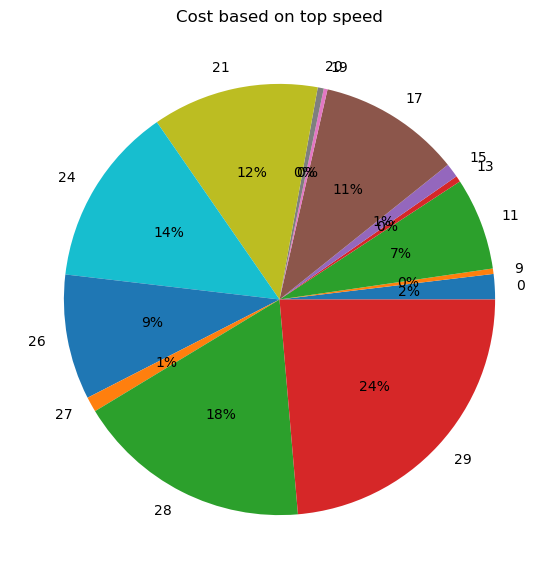

In [32]:
# Convert 'Car_price' to numeric after removing non-numeric characters
ev_car_analysis['Car_price'] = pd.to_numeric(ev_car_analysis['Car_price'].str.replace('[^\d.]', '', regex=True), errors='coerce')

# Drop rows with missing values after conversion
ev_car_analysis = ev_car_analysis.dropna(subset=['Car_price'])

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.title('Cost based on top speed')
plt.pie(x=ev_car_analysis['Car_price'], labels=ev_car_analysis.index, autopct='%1.0f%%')
plt.show()

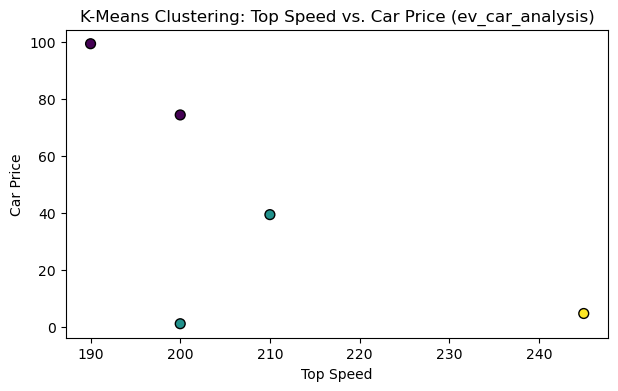

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming you have loaded your DataFrame
ev_car_analysis['Top_speed'] = ev_car_analysis['Top_speed'].astype(str)

# Clean the 'Top_speed' column by removing non-numeric characters and converting to numeric
ev_car_analysis['Top_speed'] = pd.to_numeric(ev_car_analysis['Top_speed'].str.replace('[^\d.]', '', regex=True), errors='coerce')

ev_car_analysis = ev_car_analysis.dropna(subset=['Top_speed'])

X_ev_car_analysis = ev_car_analysis[['Top_speed', 'Car_price']]

scaler_ev_car_analysis = StandardScaler()
kmeans_ev_car_analysis = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters (K)
pipeline_ev_car_analysis = make_pipeline(scaler_ev_car_analysis, kmeans_ev_car_analysis)

pipeline_ev_car_analysis.fit(X_ev_car_analysis)
ev_car_analysis['Cluster'] = pipeline_ev_car_analysis.predict(X_ev_car_analysis)

plt.figure(figsize=(7, 4))
plt.scatter(X_ev_car_analysis['Top_speed'], X_ev_car_analysis['Car_price'], c=ev_car_analysis['Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.title('K-Means Clustering: Top Speed vs. Car Price (ev_car_analysis)')
plt.xlabel('Top Speed')
plt.ylabel('Car Price')
plt.show()

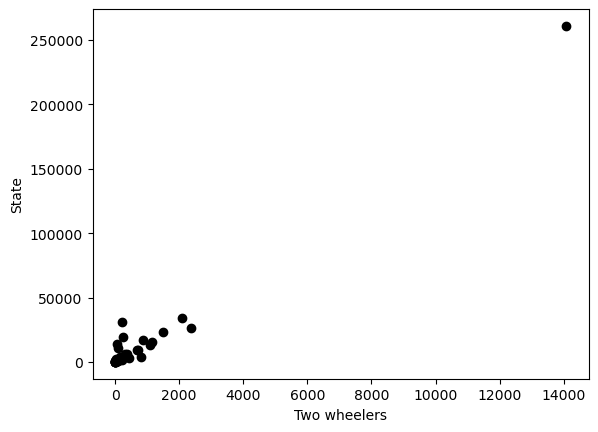

In [36]:
X = ev_geo_data[["Two Wheelers (Category L2 (CMVR))","Total in state"]]
#Visualise data points
plt.scatter(X["Two Wheelers (Category L2 (CMVR))"],X["Total in state"],c='black')
plt.xlabel('Two wheelers')
plt.ylabel('State')
plt.show()

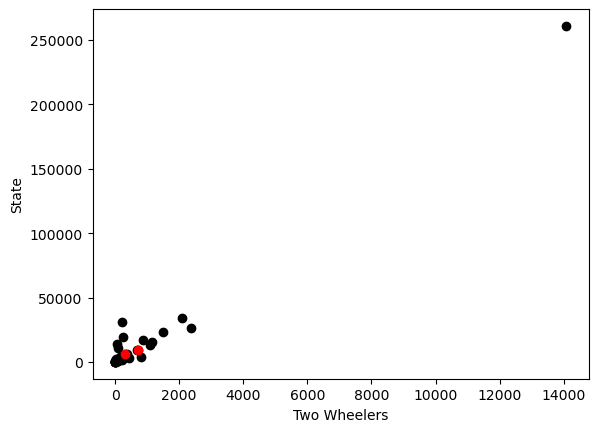

In [36]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Two Wheelers (Category L2 (CMVR))"],X["Total in state"],c='black')
plt.scatter(Centroids["Two Wheelers (Category L2 (CMVR))"],Centroids["Total in state"],c='red')
plt.xlabel('Two Wheelers')
plt.ylabel('State')
plt.show()

In [38]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
import numpy as np
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Two Wheelers (Category L2 (CMVR))"]-row_d["Two Wheelers (Category L2 (CMVR))"])**2
            d2=(row_c["Total in state"]-row_d["Total in state"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Total in state","Two Wheelers (Category L2 (CMVR))"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Total in state'] - Centroids['Total in state']).sum() + (Centroids_new['Two Wheelers (Category L2 (CMVR))'] - Centroids['Two Wheelers (Category L2 (CMVR))']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Total in state","Two Wheelers (Category L2 (CMVR))"]]

30165.951612903224
70405.40972222222
165829.42361111115
2705.305555555553
1535.1706349206374
0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14252\418117622.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_14252\418117622.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_14252\418117622.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

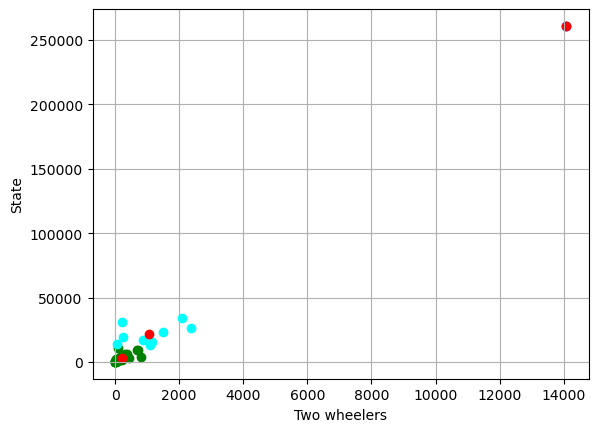

In [41]:
color=['blue','green','cyan']
for k in range(K):
    ev_geo_data=X[X["Cluster"]==k+1]
    plt.scatter(ev_geo_data["Two Wheelers (Category L2 (CMVR))"],ev_geo_data["Total in state"],c=color[k])
plt.scatter(Centroids["Two Wheelers (Category L2 (CMVR))"],Centroids["Total in state"],c='red')
plt.xlabel('Two wheelers')
plt.ylabel('State')
plt.grid(True)
plt.show()